<a href="https://colab.research.google.com/github/Amw839/CSCE625_HW8_DeepLearning_XOR_MNIST_AmiraWallace/blob/main/CSCE625_HW8_DeepLearning_XOR_MNIST_AmiraWallace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# CSCE 625 - Homework 8
# Deep Learning Section
# Author: Amira Wallace
# File: CSCE625_HW8_DeepLearning_XOR_MNIST_AmiraWallace.ipynb
# ============================================================

# 💬ChatGPT Session Reference:
# "https://chat.openai.com/share/<paste-your-session-link-here>"

#  Prompt Summary:
# I asked ChatGPT to guide me through Homework 8 (Deep Learning section),
# including building a simple neural network for XOR,
# a CNN for MNIST, and a gradient descent visualization.
# ChatGPT provided step-by-step code, explanations, and plots.


In [1]:
'''
We implement a simple neural network to learn the XOR logical function.
The XOR problem demonstrates non-linear separability, which requires at least one hidden layer.#
'''
# Problem 2: XOR with Neural Network
import tensorflow as tf
import numpy as np

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=1000, verbose=0)

print("Final Accuracy:", model.evaluate(X, y)[1])
print("Predictions:", model.predict(X))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5000 - loss: 0.6931
Final Accuracy: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [2]:
'''
We train a Convolutional Neural Network to classify handwritten digits (0–9) using the MNIST dataset.
'''
# Problem 4: CNN on MNIST
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(25, (5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.8517 - loss: 0.5104 - val_accuracy: 0.9772 - val_loss: 0.0872
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9752 - loss: 0.0817 - val_accuracy: 0.9828 - val_loss: 0.0634
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9850 - val_loss: 0.0516
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9845 - val_loss: 0.0510
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9913 - loss: 0.0296 - val_accuracy: 0.9882 - val_loss: 0.0456
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9834 - loss: 0.0462
Test accuracy: 0.9871


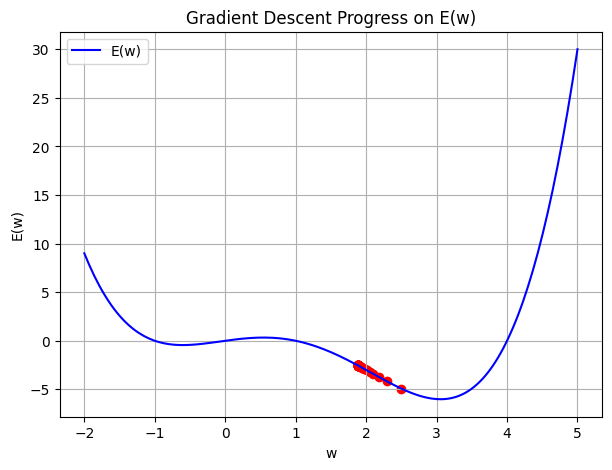

In [3]:
'''
We visualize gradient descent on a one-dimensional function
E(w).This demonstrates how the gradient drives the parameter
𝑤 toward a minimum.

'''
# Problem 5: Gradient Descent Visualization

import numpy as np
import matplotlib.pyplot as plt

def E(w):
    return 0.25 * w * (w + 1) * (w - 1) * (w - 4)

def E_grad(w):
    return 0.25 * (4*w**3 - 6*w**2 - 5*w + 4)

# Initialize
alpha = 0.05
w = 2.5
weights, losses = [], []

for _ in range(50):
    weights.append(w)
    losses.append(E(w))
    w -= alpha * E_grad(w)

# Plot
plt.figure(figsize=(7,5))
ws = np.linspace(-2, 5, 200)
plt.plot(ws, E(ws), 'b-', label='E(w)')
plt.scatter(weights, losses, c='r')
plt.title("Gradient Descent Progress on E(w)")
plt.xlabel("w")
plt.ylabel("E(w)")
plt.legend()
plt.grid(True)
plt.show()
